In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
# Function to read all the datasets
def read_all(template,start,end):
    frames = [ pd.read_json(f).fillna(0) for f in [template.format(i) for i in range(start,end)] ]
    X = pd.concat(frames, ignore_index = True,sort = True)
    return X

In [3]:
template = "datasets/dataset_processed_v2/dataset_{:02}.json"
df = read_all(template,0,25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Columns: 197 entries, Ak47_ct to t_leads
dtypes: float64(1), int64(179), object(17)
memory usage: 184.0+ MB


In [6]:
# colwep = ['Ak47_ct', 'Ak47_t', 'Aug_ct', 'Aug_t', 'Awp_ct', 'Awp_t', 'C4_t', 'Cz75Auto_ct',\
#           'Cz75Auto_t', 'Deagle_ct', 'Deagle_t', 'DecoyGrenade_ct', 'DecoyGrenade_t', 'Flashbang_ct',\
#           'Flashbang_t', 'Glock_ct', 'Glock_t', 'HeGrenade_ct', 'HeGrenade_t', 'M4a4_ct', 'M4a4_t',\
#           'IncendiaryGrenade_ct', 'IncendiaryGrenade_t', 'Mp9_ct', 'Mp9_t', 'P2000_ct',\
#           'P2000_t', 'P250_ct', 'P250_t', 'Sg553_ct', 'Sg553_t', 'SmokeGrenade_ct', 'SmokeGrenade_t',\
#           'UspS_ct', 'UspS_t','MolotovGrenade_ct', 'MolotovGrenade_t']

# # colwep = ['Ak47_ct', 'Ak47_t', 'Aug_ct', 'Aug_t', 'Awp_ct', 'Awp_t', 'C4_t',\
# #           'Deagle_ct', 'Deagle_t', 'Flashbang_ct',\
# #           'Flashbang_t', 'Glock_ct', 'Glock_t', 'HeGrenade_ct', 'HeGrenade_t', 'M4a4_ct', 'M4a4_t',\
# #           'MolotovIancendiaryGrenade_ct', 'MolotovIncendiaryGrenade_t', 'P2000_ct',\
# #           'P2000_t', 'P250_ct', 'P250_t', 'Sg553_ct', 'Sg553_t', 'SmokeGrenade_ct', 'SmokeGrenade_t',\
# #           'UspS_ct', 'UspS_t']

# colpla = ['alive_players_ct', 'alive_players_t', 'armor_ct1_Bin_Code', 'armor_ct2_Bin_Code',\
#           'armor_ct3_Bin_Code', 'armor_ct4_Bin_Code', 'armor_ct5_Bin_Code', 'armor_ct_Bin_Code',\
#           'armor_t1_Bin_Code', 'armor_t2_Bin_Code', 'armor_t3_Bin_Code', 'armor_t4_Bin_Code',\
#           'armor_t5_Bin_Code', 'armor_t_Bin_Code','defuse_kit_ct1', 'defuse_kit_ct2',\
#           'defuse_kit_ct3', 'defuse_kit_ct4', 'defuse_kit_ct5','defuse_kit_ct', \
#           'has_helmet_ct1', 'has_helmet_ct2', 'has_helmet_ct3', 'has_helmet_ct4', 'has_helmet_ct5', \
#           'has_helmet_ct','has_helmet_t1', 'has_helmet_t2', 'has_helmet_t3', 'has_helmet_t4',\
#           'has_helmet_t5','has_helmet_t', 'health_ct1_Bin_Code', 'health_ct2_Bin_Code', \
#           'health_ct3_Bin_Code', 'health_ct4_Bin_Code', 'health_ct5_Bin_Code','health_ct_Bin_Code',\
#           'health_t1_Bin_Code', 'health_t2_Bin_Code', 'health_t3_Bin_Code', 'health_t4_Bin_Code',\
#           'health_t5_Bin_Code','health_t_Bin_Code','money_ct1_Bin_Code', 'money_ct2_Bin_Code',\
#           'money_ct3_Bin_Code', 'money_ct4_Bin_Code', 'money_ct5_Bin_Code', \
#           'money_ct_Bin_Code', 'money_t1_Bin_Code', 'money_t2_Bin_Code', 'money_t3_Bin_Code', \
#           'money_t4_Bin_Code', 'money_t5_Bin_Code', 'money_t_Bin_Code']

# colsta = ['current_score_ct', 'current_score_t','t_leads','round_status_BombPlanted',\
#           'round_status_FreezeTime', 'round_status_Normal', 'round_status_time_left']

# colkill = ['kwct_Ak47', 'kwct_Aug', 'kwct_Awp', 'kwct_C4', 'kwct_Cz75Auto', 'kwct_Deagle',\
#            'kwct_Flashbang', 'kwct_Glock', 'kwct_HeGrenade', 'kwct_Knife', 'kwct_M4a4',\
#            'kwct_MolotovIncendiaryGrenade', 'kwct_Mp9', 'kwct_P2000', 'kwct_P250', 'kwct_Sg553',\
#            'kwct_SmokeGrenade', 'kwct_UspS', 'kwct_other_heavy', 'kwct_other_pistols',\
#            'kwct_other_rifles', 'kwct_other_smgs', 'kwct_other_utils', 'kwct_other_world', 'kwt_Ak47',\
#            'kwt_Aug', 'kwt_Awp', 'kwt_C4', 'kwt_Cz75Auto', 'kwt_Deagle', 'kwt_Flashbang', 'kwt_Glock',\
#            'kwt_HeGrenade', 'kwt_Knife', 'kwt_M4a4', 'kwt_MolotovIncendiaryGrenade', 'kwt_Mp9',\
#            'kwt_P2000', 'kwt_P250', 'kwt_Sg553', 'kwt_SmokeGrenade', 'kwt_UspS', 'kwt_other_heavy',\
#            'kwt_other_pistols', 'kwt_other_rifles', 'kwt_other_smgs', 'kwt_other_utils',\
#            'kwt_other_world']

# colmap = ['map_de_dust2', 'map_de_inferno', 'map_de_mirage', 'map_de_nuke', 'map_de_overpass',\
#           'map_de_train', 'map_de_vertigo','map_de_cache']

# # colpos = ['pos_bs_ct1', 'pos_bs_ct2', 'pos_bs_ct3', 'pos_bs_ct4', 'pos_bs_ct5', 'pos_bs_t1',\
# #           'pos_bs_t2', 'pos_bs_t3', 'pos_bs_t4', 'pos_bs_t5']

# colpos = ['pos_bs_ct1', 'pos_bs_ct2', 'pos_bs_ct3', 'pos_bs_ct4', 'pos_bs_ct5', 'pos_bs_t1',\
#           'pos_bs_t2', 'pos_bs_t3', 'pos_bs_t4', 'pos_bs_t5', 'pr_ct1','pr_ct2', 'pr_ct3',\
#           'pr_ct4', 'pr_ct5', 'pr_t1', 'pr_t2', 'pr_t3', 'pr_t4', 'pr_t5']

# # cols = colpla+colmap+colwep
# cols = colpla+colmap+colwep+colsta+colpos

# imp_cols = ['alive_players_ct', 'alive_players_t', 'armor_ct1_Bin_Code', 'armor_ct2_Bin_Code',\
#             'armor_ct3_Bin_Code', 'armor_ct4_Bin_Code', 'armor_ct5_Bin_Code', 'armor_ct_Bin_Code',\
#             'armor_t1_Bin_Code', 'armor_t2_Bin_Code', 'armor_t3_Bin_Code', 'armor_t4_Bin_Code',\
#             'armor_t5_Bin_Code', 'armor_t_Bin_Code', 'defuse_kit_ct1', 'defuse_kit_ct2',\
#             'defuse_kit_ct3', 'defuse_kit_ct4', 'defuse_kit_ct5', 'defuse_kit_ct', 'has_helmet_ct1',\
#             'has_helmet_ct2', 'has_helmet_ct3', 'has_helmet_ct4', 'has_helmet_ct5', 'has_helmet_ct',\
#             'has_helmet_t1', 'has_helmet_t2', 'has_helmet_t3', 'has_helmet_t4', 'has_helmet_t5',\
#             'has_helmet_t', 'health_ct1_Bin_Code', 'health_ct2_Bin_Code', 'health_ct3_Bin_Code',\
#             'health_ct4_Bin_Code', 'health_ct5_Bin_Code', 'health_ct_Bin_Code', 'health_t1_Bin_Code',\
#             'health_t2_Bin_Code', 'health_t3_Bin_Code', 'health_t4_Bin_Code', 'health_t5_Bin_Code',\
#             'health_t_Bin_Code', 'money_ct1_Bin_Code', 'money_ct2_Bin_Code', 'money_ct3_Bin_Code',\
#             'money_ct4_Bin_Code', 'money_ct5_Bin_Code', 'money_ct_Bin_Code', 'money_t1_Bin_Code',\
#             'money_t2_Bin_Code', 'money_t3_Bin_Code', 'money_t4_Bin_Code', 'money_t5_Bin_Code',\
#             'money_t_Bin_Code', 'map_de_dust2', 'map_de_inferno', 'map_de_mirage', 'map_de_nuke',\
#             'map_de_overpass', 'map_de_train', 'map_de_vertigo', 'Ak47_ct', 'Ak47_t', 'Aug_ct',\
#             'Awp_ct', 'Awp_t', 'C4_t', 'Cz75Auto_ct', 'Deagle_ct', 'Deagle_t', 'Flashbang_ct',\
#             'Flashbang_t', 'Glock_t', 'HeGrenade_ct', 'HeGrenade_t', 'M4a4_ct',\
#             'IncendiaryGrenade_ct', 'IncendiaryGrenade_t', 'Mp9_ct', 'P2000_ct',\
#             'P250_ct', 'P250_t', 'Sg553_ct', 'Sg553_t', 'SmokeGrenade_ct', 'SmokeGrenade_t',\
#             'UspS_ct','MolotovGrenade_ct', 'MolotovGrenade_t']
# non_imp_cols = [ 'Aug_t', 'C4_t', 'Cz75Auto_t',\
#                 'DecoyGrenade_ct', 'DecoyGrenade_t', 'Glock_ct', 'M4a4_t', 'IncendiaryGrenade_t',\
#                 'Mp9_ct', 'Mp9_t', 'P2000_t', 'UspS_t', 'MolotovGrenade_ct',\
#                 'round_status_FreezeTime']
# for col in non_imp_cols:
#     cols.remove(col)
# # cols = imp_cols

In [7]:
# colwep = ['Ak47_ct', 'Ak47_t', 'Aug_ct', 'Aug_t', 'Awp_ct', 'Awp_t', 'C4_t', 'Cz75Auto_ct',\
#           'Cz75Auto_t', 'Deagle_ct', 'Deagle_t', 'DecoyGrenade_ct', 'DecoyGrenade_t', 'Flashbang_ct',\
#           'Flashbang_t', 'Glock_ct', 'Glock_t', 'HeGrenade_ct', 'HeGrenade_t', 'M4a4_ct', 'M4a4_t',\
#           'IncendiaryGrenade_ct', 'IncendiaryGrenade_t', 'Mp9_ct', 'Mp9_t', 'P2000_ct',\
#           'P2000_t', 'P250_ct', 'P250_t', 'Sg553_ct', 'Sg553_t', 'SmokeGrenade_ct', 'SmokeGrenade_t',\
#           'UspS_ct', 'UspS_t','MolotovGrenade_ct', 'MolotovGrenade_t']

# colpla = ['alive_players_ct', 'alive_players_t', 'armor_ct1', 'armor_ct2',\
#           'armor_ct3', 'armor_ct4', 'armor_ct5', 'armor_ct',\
#           'armor_t1', 'armor_t2', 'armor_t3', 'armor_t4',\
#           'armor_t5', 'armor_t','defuse_kit_ct1', 'defuse_kit_ct2',\
#           'defuse_kit_ct3', 'defuse_kit_ct4', 'defuse_kit_ct5','defuse_kit_ct', \
#           'has_helmet_ct1', 'has_helmet_ct2', 'has_helmet_ct3', 'has_helmet_ct4', 'has_helmet_ct5', \
#           'has_helmet_ct','has_helmet_t1', 'has_helmet_t2', 'has_helmet_t3', 'has_helmet_t4',\
#           'has_helmet_t5','has_helmet_t', 'health_ct1', 'health_ct2', \
#           'health_ct3', 'health_ct4', 'health_ct5','health_ct',\
#           'health_t1', 'health_t2', 'health_t3', 'health_t4',\
#           'health_t5','health_t','money_ct1', 'money_ct2',\
#           'money_ct3', 'money_ct4', 'money_ct5', \
#           'money_ct', 'money_t1', 'money_t2', 'money_t3', \
#           'money_t4', 'money_t5', 'money_t']

# colsta = ['current_score_ct', 'current_score_t','t_leads','round_status_BombPlanted',\
#           'round_status_FreezeTime', 'round_status_Normal', 'round_status_time_left']

# colmap = ['map_de_dust2', 'map_de_inferno', 'map_de_mirage', 'map_de_nuke', 'map_de_overpass',\
#           'map_de_train', 'map_de_vertigo','map_de_cache']

# colpos = ['pos_bs_ct1', 'pos_bs_ct2', 'pos_bs_ct3', 'pos_bs_ct4', 'pos_bs_ct5', 'pos_bs_t1',\
#           'pos_bs_t2', 'pos_bs_t3', 'pos_bs_t4', 'pos_bs_t5', 'pr_ct1','pr_ct2', 'pr_ct3',\
#           'pr_ct4', 'pr_ct5', 'pr_t1', 'pr_t2', 'pr_t3', 'pr_t4', 'pr_t5']

# # cols = colpla+colmap+colwep
# cols = colpla+colmap+colwep+colsta+colpos

# imp_cols = ['alive_players_ct', 'alive_players_t', 'armor_ct1', 'armor_ct2',\
#             'armor_ct3', 'armor_ct4', 'armor_ct5', 'armor_ct',\
#             'armor_t1', 'armor_t2', 'armor_t3', 'armor_t4',\
#             'armor_t5', 'armor_t', 'defuse_kit_ct1', 'defuse_kit_ct2',\
#             'defuse_kit_ct3', 'defuse_kit_ct4', 'defuse_kit_ct5', 'defuse_kit_ct', 'has_helmet_ct1',\
#             'has_helmet_ct2', 'has_helmet_ct3', 'has_helmet_ct4', 'has_helmet_ct5', 'has_helmet_ct',\
#             'has_helmet_t1', 'has_helmet_t2', 'has_helmet_t3', 'has_helmet_t4', 'has_helmet_t5',\
#             'has_helmet_t', 'health_ct1', 'health_ct2', 'health_ct3',\
#             'health_ct4', 'health_ct5', 'health_ct', 'health_t1',\
#             'health_t2', 'health_t3', 'health_t4', 'health_t5',\
#             'health_t', 'money_ct1', 'money_ct2', 'money_ct3',\
#             'money_ct4', 'money_ct5', 'money_ct', 'money_t1',\
#             'money_t2', 'money_t3', 'money_t4', 'money_t5',\
#             'money_t', 'map_de_dust2', 'map_de_inferno', 'map_de_mirage', 'map_de_nuke',\
#             'map_de_overpass', 'map_de_train', 'map_de_vertigo', 'Ak47_ct', 'Ak47_t', 'Aug_ct',\
#             'Awp_ct', 'Awp_t', 'C4_t', 'Cz75Auto_ct', 'Deagle_ct', 'Deagle_t', 'Flashbang_ct',\
#             'Flashbang_t', 'Glock_t', 'HeGrenade_ct', 'HeGrenade_t', 'M4a4_ct',\
#             'IncendiaryGrenade_ct', 'IncendiaryGrenade_t', 'Mp9_ct', 'P2000_ct',\
#             'P250_ct', 'P250_t', 'Sg553_ct', 'Sg553_t', 'SmokeGrenade_ct', 'SmokeGrenade_t',\
#             'UspS_ct','MolotovGrenade_ct', 'MolotovGrenade_t']
# non_imp_cols = [ 'Aug_t', 'C4_t', 'Cz75Auto_t',\
#                 'DecoyGrenade_ct', 'DecoyGrenade_t', 'Glock_ct', 'M4a4_t', 'IncendiaryGrenade_t',\
#                 'Mp9_ct', 'Mp9_t', 'P2000_t', 'UspS_t', 'MolotovGrenade_ct',\
#                 'round_status_FreezeTime']
# # for col in non_imp_cols:
# #     cols.remove(col)
# cols = imp_cols

In [8]:
cols = pickle.load(open('best_cols_v2.pickle','rb'))

In [9]:
Y_all = df['round_winner_t']
X_all = df.drop(columns='round_winner_t',axis=1)[cols]
X_all = StandardScaler().fit_transform(X_all) 

In [10]:
print("Dataset shape: ",X_all.shape)

Dataset shape:  (122410, 92)


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all,test_size=0.125)

In [12]:
XY_data = [X_train, X_test, Y_train, Y_test]

In [13]:
def GrCV(param,clf,XY_data):
    [X_train, X_test, Y_train, Y_test] = XY_data
    clf.fit(X_train,Y_train)
    Y_train_pred = clf.predict(X_train)
    Y_test_pred = clf.predict(X_test)
    print("Default Training Accuracy = {}".format(accuracy_score(Y_train_pred,Y_train)))
    print("Default Test Accuracy = {}".format(accuracy_score(Y_test_pred,Y_test)))
    cv_split = ShuffleSplit(n_splits = 5, test_size = .175, random_state = 100 )
    best_model = GridSearchCV(estimator = clf, param_grid = param, cv = cv_split,\
                              scoring = 'neg_mean_squared_error')
    best_model.fit(X_train, Y_train)
    best_param = best_model.best_params_
    print("Best parameters are : {}".format(best_param))
    clf.set_params(**best_param)
    clf.fit(X_train, Y_train)
    Y_train_pred = clf.predict(X_train)
    Y_test_pred = clf.predict(X_test)
    print("Training Accuracy = {}".format(accuracy_score(Y_train_pred,Y_train)))
    print("Test Accuracy = {}".format(accuracy_score(Y_test_pred,Y_test)))
    return clf

In [14]:
def train_predict(clf,XY_data):
    [X_train, X_test, Y_train, Y_test] = XY_data
    clf.fit(X_train,Y_train)
    Y_train_pred = clf.predict(X_train)
    Y_test_pred = clf.predict(X_test)
    print("Default Training Accuracy = {}".format(accuracy_score(Y_train_pred,Y_train)))
    print("Default Test Accuracy = {}".format(accuracy_score(Y_test_pred,Y_test)))

In [18]:
param = {
#     'criterion': ['gini', 'entropy'],
#     'splitter' : ['best','random'],
#     'bootstrap': [False,True],
#     'min_samples_split' : range(2,90,12),
#     'min_samples_leaf' : range(1,90,12),
#     'max_features' : range(12,15,2),
    'max_depth': [35,37,40,42],
    'n_estimators': [200]
}
clf_rf = RandomForestClassifier(verbose=2,n_jobs=-1,bootstrap=False)
# clf_rf.n_estimators = 200
# clf_rf.max_depth = 40
# clf_rf.ccp_alpha = 1.2420578323338789e-05
clf_rf = GrCV(param,clf_rf,XY_data)
# train_predict(clf_rf,XY_data)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100building tree 13 of 100

building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s


building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


Default Training Accuracy = 0.9977312619038727
Default Test Accuracy = 0.8625669847078813


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   25.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   20.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | e

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   21.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   20.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.2s

building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s


building tree 33 of 200
building tree 34 of 200
building tree 35 of 200building tree 36 of 200

building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.4s


building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   23.1s finished


Best parameters are : {'max_depth': 40, 'n_estimators': 200}
building tree 1 of 200
building tree 2 of 200


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 3 of 200
building tree 4 of 200
building tree 5 of 200building tree 6 of 200
building tree 7 of 200
building tree 8 of 200

building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200building tree 19 of 200

building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s


building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.3s


building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   22.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    1.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s


Training Accuracy = 0.997693916420809
Test Accuracy = 0.8629590903149915


[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.2s finished


In [ ]:
model_rfe = feature_selection.RFECV(clf_rf, step = 1, scoring = 'neg_mean_absolute_error', \
                                    cv = cv_split)
model_rfe.fit(X_train, Y_train)

In [23]:
clf_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 4000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 2,
 'warm_start': False}

In [15]:
model_data = {'clf':clf_rf,'columns':cols}

In [22]:
pickle_out = open('big_model_4000.pickle','wb')
pickle.dump(clf_rf,pickle_out)
pickle_out.close()

In [21]:
import sys
sys.getsizeof(cols)

792

In [27]:
[X_train, X_test, Y_train, Y_test] = XY_data
Y_train_pred = clf_rf.predict(X_train)
Y_test_pred = clf_rf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [207]:
1-np.mean(np.abs(Y_test_pred-Y_test))

0.8566841415465268

Feature: 0, Score: 0.00975 alive_players_ct
Feature: 1, Score: 0.00933 alive_players_t
Feature: 2, Score: 0.00496 armor_ct1_Bin_Code
Feature: 3, Score: 0.00612 armor_ct2_Bin_Code
Feature: 4, Score: 0.01235 armor_ct3_Bin_Code
Feature: 5, Score: 0.01402 armor_ct4_Bin_Code
Feature: 6, Score: 0.00564 armor_ct5_Bin_Code
Feature: 7, Score: 0.02270 armor_ct_Bin_Code
Feature: 8, Score: 0.00656 armor_t1_Bin_Code
Feature: 9, Score: 0.00835 armor_t2_Bin_Code
Feature: 10, Score: 0.01044 armor_t3_Bin_Code
Feature: 11, Score: 0.00777 armor_t4_Bin_Code
Feature: 12, Score: 0.00636 armor_t5_Bin_Code
Feature: 13, Score: 0.01919 armor_t_Bin_Code
Feature: 14, Score: 0.00315 defuse_kit_ct1
Feature: 15, Score: 0.00308 defuse_kit_ct2
Feature: 16, Score: 0.00344 defuse_kit_ct3
Feature: 17, Score: 0.00398 defuse_kit_ct4
Feature: 18, Score: 0.00290 defuse_kit_ct5
Feature: 19, Score: 0.01457 defuse_kit_ct
Feature: 20, Score: 0.00318 has_helmet_ct1
Feature: 21, Score: 0.00394 has_helmet_ct2
Feature: 22, Score: 0.

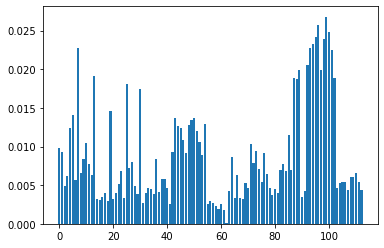

In [52]:
import matplotlib.pyplot as plt
importance = clf_rf.feature_importances_
# summarize feature importance
imp_cols = []
non_imp_cols = []
threshold = 0.003
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v),cols[i])
    if (v>threshold):
        imp_cols.append(cols[i])
    else:
        non_imp_cols.append(cols[i])
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [53]:
imp_cols

['alive_players_ct',
 'alive_players_t',
 'armor_ct1_Bin_Code',
 'armor_ct2_Bin_Code',
 'armor_ct3_Bin_Code',
 'armor_ct4_Bin_Code',
 'armor_ct5_Bin_Code',
 'armor_ct_Bin_Code',
 'armor_t1_Bin_Code',
 'armor_t2_Bin_Code',
 'armor_t3_Bin_Code',
 'armor_t4_Bin_Code',
 'armor_t5_Bin_Code',
 'armor_t_Bin_Code',
 'defuse_kit_ct1',
 'defuse_kit_ct2',
 'defuse_kit_ct3',
 'defuse_kit_ct4',
 'defuse_kit_ct',
 'has_helmet_ct1',
 'has_helmet_ct2',
 'has_helmet_ct3',
 'has_helmet_ct4',
 'has_helmet_ct5',
 'has_helmet_ct',
 'has_helmet_t2',
 'has_helmet_t3',
 'has_helmet_t4',
 'has_helmet_t5',
 'has_helmet_t',
 'health_ct2_Bin_Code',
 'health_ct3_Bin_Code',
 'health_ct4_Bin_Code',
 'health_ct5_Bin_Code',
 'health_ct_Bin_Code',
 'health_t1_Bin_Code',
 'health_t2_Bin_Code',
 'health_t3_Bin_Code',
 'health_t4_Bin_Code',
 'health_t_Bin_Code',
 'money_ct1_Bin_Code',
 'money_ct2_Bin_Code',
 'money_ct3_Bin_Code',
 'money_ct4_Bin_Code',
 'money_ct5_Bin_Code',
 'money_ct_Bin_Code',
 'money_t1_Bin_Code',
 'm

In [54]:
non_imp_cols

['defuse_kit_ct5',
 'health_ct1_Bin_Code',
 'health_t5_Bin_Code',
 'map_de_dust2',
 'map_de_inferno',
 'map_de_mirage',
 'map_de_nuke',
 'map_de_overpass',
 'map_de_train',
 'map_de_vertigo',
 'map_de_cache']

In [193]:
RandomForestClassifier?